<a href="https://colab.research.google.com/github/owilli38/DSBA-6211/blob/main/Predictive_owilli38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import numpy as np
import pandas as pd
import numpy as np
import io
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
dfOW = files.upload()
dfOW = pd.read_csv(io.BytesIO(dfOW['BankChurn.csv']))

Saving BankChurn.csv to BankChurn.csv


In [ ]:
#Exploratory Data Analysis (EDA)
print(dfOW)

      customer_id  credit_score  country  gender   age  tenure    balance  \
0        15634602           619   France  Female  42.0     2.0        NaN   
1        15647311           608    Spain  Female  41.0     1.0   83807.86   
2        15619304           502   France  Female  42.0     8.0  159660.80   
3        15701354           699   France  Female  39.0     1.0        NaN   
4        15737888           850    Spain  Female  43.0     2.0  125510.82   
...           ...           ...      ...     ...   ...     ...        ...   
9995     15606229           771   France    Male  39.0     5.0        NaN   
9996     15569892           516   France    Male  35.0    10.0   57369.61   
9997     15584532           709   France  Female  36.0     7.0        NaN   
9998     15682355           772  Germany    Male  42.0     3.0   75075.31   
9999     15628319           792   France  Female  28.0     4.0  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn 

In [ ]:
# Check the data types of columns
print(dfOW.dtypes)

# See the first few rows
print(dfOW.head())

# Get summary statistics
print(dfOW.describe())

# Check for missing values
print(dfOW.isnull().sum())

customer_id           int64
credit_score          int64
country              object
gender               object
age                 float64
tenure              float64
balance             float64
products_number     float64
credit_card         float64
active_member       float64
estimated_salary    float64
churn                 int64
dtype: object
   customer_id  credit_score country  gender   age  tenure    balance  \
0     15634602           619  France  Female  42.0     2.0        NaN   
1     15647311           608   Spain  Female  41.0     1.0   83807.86   
2     15619304           502  France  Female  42.0     8.0  159660.80   
3     15701354           699  France  Female  39.0     1.0        NaN   
4     15737888           850   Spain  Female  43.0     2.0  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0              1.0          1.0            1.0         101348.88      1  
1              1.0          0.0            1.0         112542.5

In [ ]:
# Make dummy variable, replace missing values
#print(dfOW.gender)
#print(dfOW.country.unique)
dfOW = pd.get_dummies(dfOW, columns=['gender', 'country'], drop_first=True)

dfOW['balance'].fillna(dfOW['balance'].median(), inplace=True)

numerical_features = dfOW.select_dtypes(include=np.number).columns
for feature in numerical_features:
    dfOW[feature].fillna(dfOW[feature].median(), inplace=True)

print(dfOW.isnull().sum())

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
gender_Male         0
country_Germany     0
country_Spain       0
dtype: int64


<ipython-input-5-af685d67d444>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfOW['balance'].fillna(dfOW['balance'].median(), inplace=True)
<ipython-input-5-af685d67d444>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Accuracy: 0.839


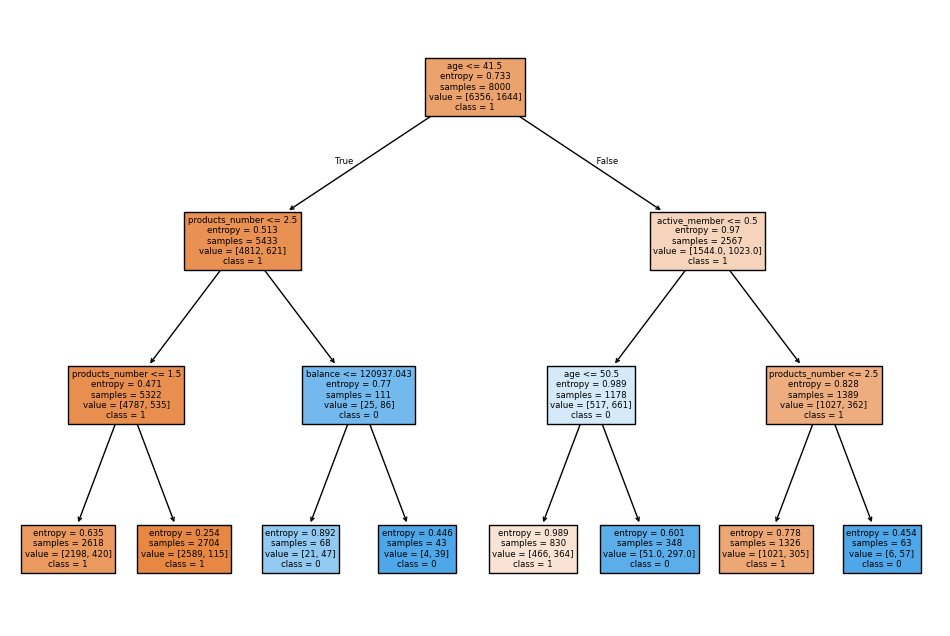

Confusion Matrix:
[[1580   27]
 [ 295   98]]


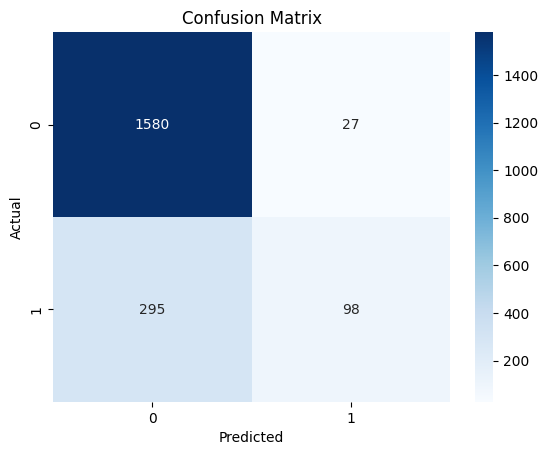

In [ ]:
X = dfOW.drop(['churn', 'customer_id'], axis=1)
y = dfOW.churn

# 3. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Create and Train Decision Tree Model
DecisionTreeOW = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)
DecisionTreeOW.fit(X_train, y_train)

# 5. Evaluate the Model
y_pred = DecisionTreeOW.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 6. Optional: Visualization
fig = plt.figure(figsize=(12, 8))
# Convert class names to strings
class_names_str = [str(c) for c in dfOW.churn.unique()]
_ = tree.plot_tree(DecisionTreeOW,
                   feature_names=X.columns,
                   class_names=class_names_str,  # Changed to class_names_str
                   filled=True)
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Accuracy: 0.869
credit_score: 0.1426
age: 0.2355
tenure: 0.0806
balance: 0.1468
products_number: 0.1300
credit_card: 0.0189
active_member: 0.0405
estimated_salary: 0.1466
gender_Male: 0.0185
country_Germany: 0.0266
country_Spain: 0.0135


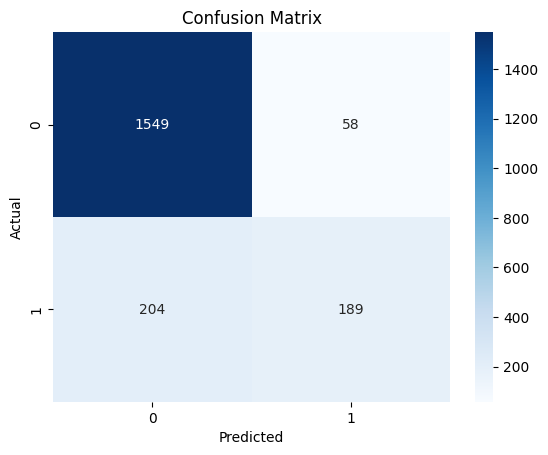

In [ ]:
rfOW = RandomForestClassifier(
    n_estimators=100,   # Number of decision trees
    max_depth=None,     # Let trees grow fully (or set a limit)
    max_features='sqrt',# Common default for classification
    random_state=42
)
rfOW.fit(X_train, y_train)

# 4. Evaluate
y_pred = rfOW.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# 5. (Optional) Check Feature Importances
importances = rfOW.feature_importances_
feature_names = X.columns,
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Accuracy (v2): 0.848


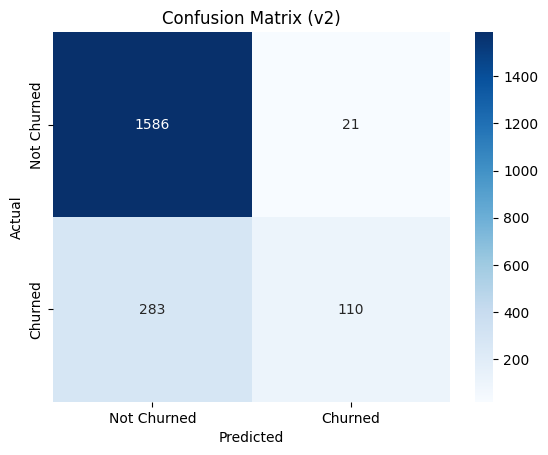

In [ ]:
rfOW_v2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    random_state=42
)
rfOW_v2.fit(X_train, y_train)

# 2. Evaluate
y_pred_v2 = rfOW_v2.predict(X_test)
accuracy_v2 = accuracy_score(y_test, y_pred_v2)
print("Random Forest Accuracy (v2):", accuracy_v2)

# 3. Confusion Matrix with Labels
conf_matrix_v2 = confusion_matrix(y_test, y_pred_v2)
sns.heatmap(conf_matrix_v2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix (v2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.8644999999999999
Test Accuracy (Best Model): 0.8675

Variable Importance:
             feature  importance
1                age    0.273173
4    products_number    0.177578
3            balance    0.135369
7   estimated_salary    0.115361
0       credit_score    0.112225
2             tenure    0.059439
6      active_member    0.054023
9    country_Germany    0.035120
8        gender_Male    0.016170
5        credit_card    0.011681
10     country_Spain    0.009862


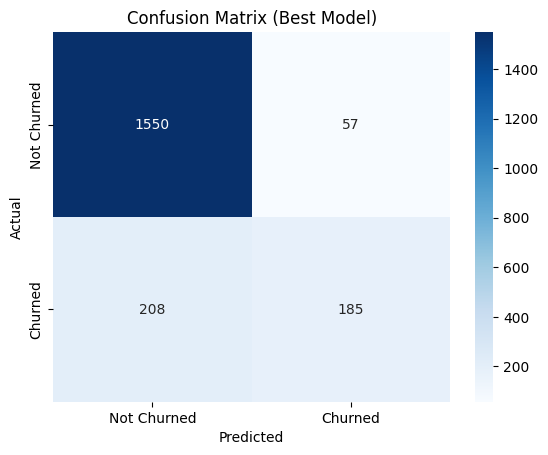

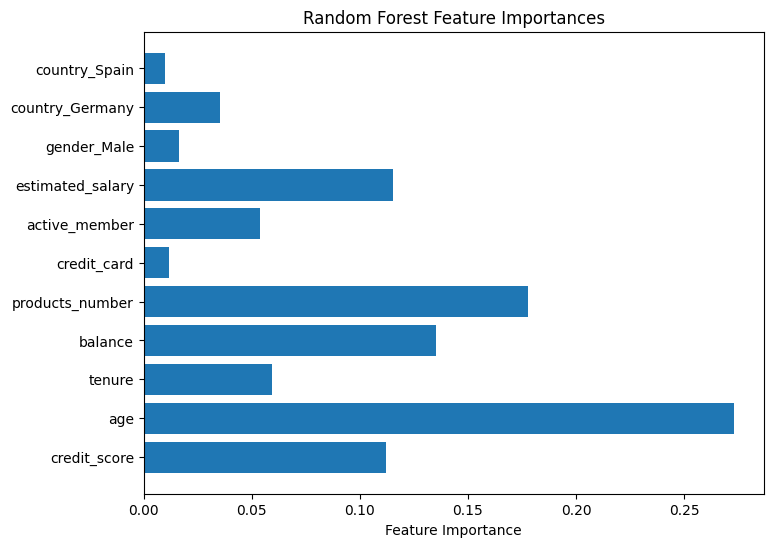

In [ ]:
# 1. Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# 2. Create GridSearchCV Object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1)  # Use all available cores

# 3. Fit to Training Data
grid_search.fit(X_train, y_train)

# 4. Get Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# 5. Evaluate on Test Set
best_rfOW = grid_search.best_estimator_
y_pred_best = best_rfOW.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Accuracy (Best Model):", accuracy_best)

# 6. Variable Importance
importances = best_rfOW.feature_importances_
feature_names = X_train.columns  # Assuming X_train has column names
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print("\nVariable Importance:")
print(feature_importances)

# 7. Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [ ]:
svm_linearOW = SVC(kernel='linear', C=1.0, random_state=42)
svm_linearOW.fit(X_train, y_train)

y_pred_linear = svm_linearOW.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

# 2. SVM with Radial Kernel (RBF)
svm_rbfOW = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbfOW.fit(X_train, y_train)

y_pred_rbf = svm_rbfOW.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (Radial Kernel):", accuracy_rbf)

# 3. Compare Performance
print("\nComparison:")
if accuracy_linear > accuracy_rbf:
    print("Linear kernel performs better.")
elif accuracy_rbf > accuracy_linear:
    print("Radial kernel performs better.")
else:
    print("Both kernels have similar performance.")

Accuracy (Linear Kernel): 0.7955
Accuracy (Radial Kernel): 0.8035

Comparison:
Radial kernel performs better.


In [ ]:
svm_baselineOW = SVC(random_state=42)
svm_baselineOW.fit(X_train, y_train)
y_pred_baseline = svm_baselineOW.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", accuracy_baseline)

param_grid_c = {'C': [0.1, 1, 10, 100]}
grid_search_c = GridSearchCV(SVC(random_state=42), param_grid_c, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_c.fit(X_train, y_train)
print("Best C:", grid_search_c.best_params_['C'])

param_grid_kernel = {'kernel': ['linear', 'rbf', 'poly']}
grid_search_kernel = GridSearchCV(SVC(C=grid_search_c.best_params_['C'], random_state=42), param_grid_kernel, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_kernel.fit(X_train, y_train)
print("Best kernel:", grid_search_kernel.best_params_['kernel'])

if grid_search_kernel.best_params_['kernel'] in ['rbf', 'poly', 'sigmoid']:
    param_grid_gamma = {'gamma': ['scale', 'auto', 0.1, 1, 10]}
    grid_search_gamma = GridSearchCV(SVC(C=grid_search_c.best_params_['C'], kernel=grid_search_kernel.best_params_['kernel'], random_state=42), param_grid_gamma, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search_gamma.fit(X_train, y_train)
    print("Best gamma:", grid_search_gamma.best_params_['gamma'])

Baseline Accuracy: 0.8035
Best C: 0.1
Best kernel: rbf
Best gamma: scale


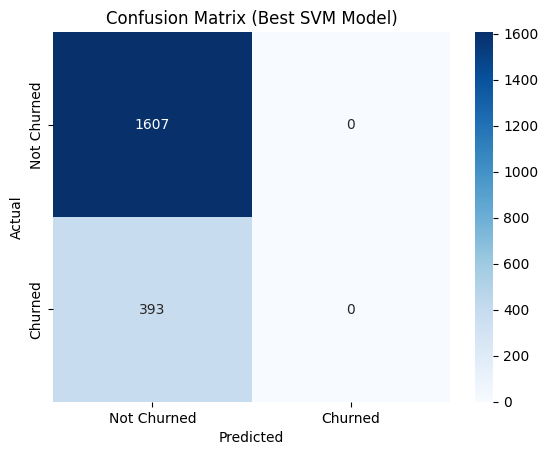

In [ ]:
best_params = {'C': grid_search_c.best_params_['C'],
              'kernel': grid_search_kernel.best_params_['kernel']}
if 'gamma' in grid_search_gamma.best_params_:
    best_params['gamma'] = grid_search_gamma.best_params_['gamma']


best_svmOW = SVC(**best_params, random_state=42)
best_svmOW.fit(X_train, y_train)

y_pred_best = best_svmOW.predict(X_test)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)

sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix (Best SVM Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()